## 2. Random Sample Imputation

### Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

### When should it be used? It assumes that the data are missing completely at random(MCAR)





##### Both Random sample imputation and mean/median/mode are used when missing values are under  MCAR state

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('D:/pandas data analysis/csv data/pandas data analysis/titanic_data.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
# Replacing NAN values by Random values (Age variable)

In [6]:
df['Age'].isnull().sum()   #used to find no. of nan in age variable

177

In [7]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)  #Replacing the nan with random values.

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [8]:
df[df['Age'].isnull()].index          # Rows of nan values

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [9]:
def impute_nan(df,variable):
    df[variable+'_median']=df[variable].fillna(df[variable].median())
    df[variable+'_random']=df[variable]
    random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
    random_sample.index=df[df['Age'].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [10]:
impute_nan(df,'Age')

In [11]:
df[df.Age.isnull()].head()

,Survived,Age,Fare,Age_median,Age_random
5,0,NaN,8.4583,28.0,28.00
17,1,NaN,13.0000,28.0,50.00
19,1,NaN,7.2250,28.0,0.92
26,0,NaN,7.2250,28.0,36.00
28,1,NaN,7.8792,28.0,26.00


In [12]:
# comparing the distribution of age_median and age_random

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import warnings
warnings.filterwarnings('ignore')

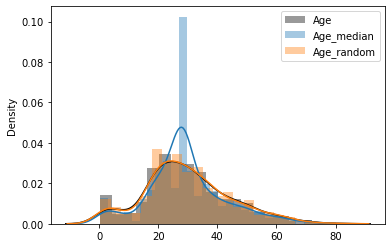

In [14]:
sns.distplot(df.Age,label='Age',color='black')
sns.distplot(df.Age_median,label='Age_median')
sns.distplot(df.Age_random,label='Age_random')
plt.xlabel(None)
plt.legend()

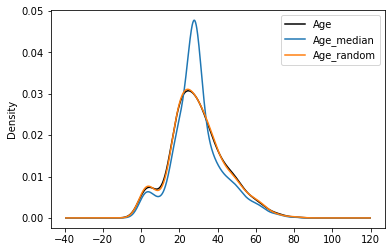

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='black')
df['Age_median'].plot(kind='kde',ax=ax)
df['Age_random'].plot(kind='kde',ax=ax)
ax.legend()

### Advantage: 
1. Easy to implement
2. Less distortion in variance

### Disadvantage
1. Every situation randomness won't work

## 3. Capturing NAN values with new feature

### It works well if the data are not missing at random (MNAR)

In [18]:
df=pd.read_csv('D:/pandas data analysis/csv data/pandas data analysis/titanic_data.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [23]:
df.iloc[31:38]

,Survived,Age,Fare,Age_NAN
31,1,NaN,146.5208,1
32,1,NaN,7.7500,1
33,0,66.0,10.5000,0
34,0,28.0,82.1708,0
35,0,42.0,52.0000,0
36,1,NaN,7.2292,1
37,0,21.0,8.0500,0


In [24]:
df['Age_median']=df['Age'].fillna(df['Age'].median())

In [25]:
df.iloc[31:38]

,Survived,Age,Fare,Age_NAN,Age_median
31,1,NaN,146.5208,1,28.0
32,1,NaN,7.7500,1,28.0
33,0,66.0,10.5000,0,66.0
34,0,28.0,82.1708,0,28.0
35,0,42.0,52.0000,0,42.0
36,1,NaN,7.2292,1,28.0
37,0,21.0,8.0500,0,21.0


## Advantages
1. Easy to implement
2. Captures the importance of missing values

## Disadvantages
1. Creating Additional Features(Curse of Dimensionality)